In [20]:
using Distributions
using PyPlot

In [1]:
import Base: +
+(x::Integer, y::ASCIIString) = x + parse(Int, y)

+ (generic function with 172 methods)

In [13]:
super(Array)
super(DenseArray{Int, 3})
super(AbstractArray{Int, 3})
super(AbstractVector{Int64})

Any

In [14]:
function sum_array(x)
    sum = 0.0
    for i in 1:length(x)
        sum += x[i]
    end
    return sum
end

sum_array (generic function with 1 method)

In [17]:
x = linspace(0, 1, 1e6)
y = Any[i/1e6 for i in 0:1e6]

@time sum_array(x)
@time sum_array(y)

  0.007001 seconds (5 allocations: 176 bytes)
  0.153992 seconds (1.00 M allocations: 15.259 MB, 73.14% gc time)


500000.50000000006

# Exercise1

$$
X_{t+1} = aX_t + b + \sigma \epsilon_t, \hspace{10pt} \epsilon_t \ i.i.d \ \sim  \ \phi
$$

In [30]:
type AR1
    a::Real
    b::Real
    sigma::Real
    phi::Distribution
end

function simulate(m::AR1, initial::Real=0.0, repeat::Int=100)
    x_list = Array{Float64}(repeat)
    eps_list = rand(m.phi, repeat)
    x = initial
    
    for i in 1:repeat
        x_list[i] = m.a * x + m.b + m.sigma * eps_list[i]
        x = x_list[i]
    end
    
    return x_list
end

simulate (generic function with 3 methods)

In [31]:
srand(620)
m = AR1(0.8, 0, 1, Normal(0, 1))
xs = simulate(m, 0, 500)

for x in xs[1:20]
    println(x)
end

-0.538747415114494
-2.9200983440736206
-3.1806298688602768
-2.049244090628807
-3.652167563577761
-4.929235226749336
-3.049487744595497
-2.999479471291362
-2.0989108105129666
-2.3482040748798787
-1.835165237532889
-1.3196409623902379
-0.1566662297912722
-0.7271499184699923
-1.5569134509991573
-1.5591628346730282
-0.6373032944153231
-0.5493531663308254
0.0833119549551038
0.3151575935026018


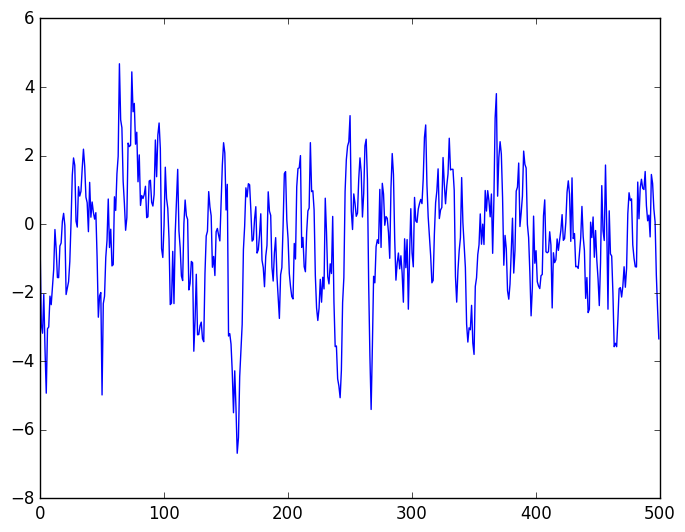

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31fc5b7f0>

In [32]:
plot(xs)